#Evalutaing Patient Readmission Risk


---

Group 10:

#1 - Business problem definition and data description

For reputational and financial reasons, hospitals tend to avoid readmissions.

Readmission is a healthcare metric that tracks patients who are re-admitted to a hospital within 30 days. This is generally avoided by hospitals and is in the best interest of patients due to many complications, such as reduced coverage during readmissions from insurances like Medicare, which can cause financial issues for hospitals and patients themselves (2012).

Hence, the business problem for US hospitals here is that they are losing money and credibility by having readmissions. We believe that by analyzing the most prominent groups of readmitted patients, we can lower the readmission rates through prevention."







-----


Through the data from Clinical and Translational Research at Virginia Commonwealth University, we're able to explore 10 years (1999-2008) of clinical care data at 130 US hospitals and integrated delivery networks. This dataset includes information on diabetic inpatient encounters ranging from 1 to 14 days and whether the encountered patients are readmitted (No, > 30 days, < 30 days).

There are 55 variables and 100k instances, including some with missing values. The variables can generally be divided into four portions:

      - Demographic/basic information:
          - encounter_id: Unique identifier for the encounter
          - patient_nbr: Unique identifier of the patient
          - race: Patient's race (Mapped to numercal values from 0 to 6)
          - gender: Patient's gender (Male/Female)
          - age: Age grouped in 10-year intervals from 0 to 100
          - weight: Weight in pounds
      
      - Diagnosis:
          - admission_type_id: Integer identifier that corresponds to different types of admission (mappig in Appendix Section)
          - discharge_disposition_id: Integer identifier that corresponds to different types of discharge conditions (mapping in Appendix Section)
          - admission_source_id
          - time_in_hospital: Number of days between admission and discharge (int64)
          - payer_code: Unique identifier (key) that indicates who is paying (object). Includes self-pay
          - medical_specialty: Specialty of the admitting doc (object)
          - num_lab_procedures: Number of lab tests performed during stay (int64)
          - num_procedures: Number of distinct generic meds given during stay (int64)
          - num_medications: Number of distinct generic meds given during stay (int64)
          - number_outpatient: Number of outpatient(service/treatment that does not require hospitalization) visits the patient had in the year preceding the stay (int64)
          - number_emergency: Number of emergency visits of the patient preceding the stay (int64)
          - number_inpatient: Number of inpatient visits (required hospitalization) in the year preceding the stay (int64)
          - diag_1, diag_2, diag_3: the primary and two secondary diagnosis of each patient. Due to the high number of possible diagnosis, we first group them into higher level diseases groups. (ADD SOURCE OF GROUPING METHOD)
          - number_diagnoses: Total number of diagnosis (int64)
          - max_glu_serum, A1Cresult: Tests for blood sugar the day of and in the past three months respectively. (object)

       - Diabetic Medications: list of diabetic medicines (int64)
          - metformin
          - repaglinide
          - nateglinide
          - chlorpropamide
          - glimepiride
          - acetohexamide
          - glipizide
          - glyburide
          - tolbutamide
          - pioglitazone
          - rosiglitazone
          - acarbose
          - miglitol
          - troglitazone
          - tolazamide
          - examide
          - citoglipton
          - insulin
          - glyburide-metformin
          - glipizide-metformin
          - glimepiride-pioglitazone
          - metformin-rosiglitazone
          - metformin-pioglitazone
          - change: Indicate if there is a change in diabetic medication ( either dosage or generic name) (Ch/No)
          - diabetesMed: Indicates if there was ny diabetic medications prescibed (yes/no)
        
       - Readmission:
          - readmitted: if the patient will be readmitted into the same hospital (<30/ >30/ No)
  
By looking into how the demographic, diabetic diagnosis and diabetic medication histories can affect patients' readmission type, we hope to provide a business solution for hospitals to prevent key readmitted populations from premature discharges and more careful inpatient treatments upon diagnosis.

##1.2 - Notes on how to use this notebook:


*   The full dataset was downloaded as assigned to the variable `df`
*   The cleaned version of the dataset, used in the initial exploratory analysis was assgined to `df_clean`



#2 - Loading the inital dataset and required libraries:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Initial dataset:
df = pd.read_csv('https://raw.githubusercontent.com/eshentong/BA780-team10-project/main/readmission.csv')

#Create dataset copy to be cleaned
df_clean = df.copy()

#3 - Data Cleaning and Transformation:

##3.0 - Note:

When listing all the columns for the initial dataset, df.info() returns that there are no null values in any of the columns. However, after the initial data cleaning and exploration of the data, we found that many columns had a significant number of missing values, which were only marked with different types of symbols, with the most common one being '?'.

##3.1 - Demographic and Basic Information:

`encounter_id`


---


*   Set as index





In [3]:
#Set the encounter_id as the index for the dataset
df_clean.set_index('encounter_id', inplace=True)

`patient_nbr`


---


In [4]:
df['patient_nbr'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 101766 entries, 0 to 101765
Series name: patient_nbr
Non-Null Count   Dtype
--------------   -----
101766 non-null  int64
dtypes: int64(1)
memory usage: 795.2 KB


`race`


---


* There are 2273 (2%) values missing
* Keep the variable, but replace `'?'` entries with `None`

In [5]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [6]:
#Missing values:
len(df['race'][df['race'] == '?']), (len(df['race'][df['race'] == '?'])/len(df))*100

(2273, 2.2335554114340743)

In [7]:
#Replace the '?' result with None
race_map = {'?':None}
df_clean['race'].replace(race_map, inplace=True)

`gender`


---


* There are only 3 (0.003%) values missing

In [8]:
df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [9]:
#Missing values:
len(df['gender'][df['gender'] == 'Unknown/Invalid']), (len(df['gender'][df['gender'] == 'Unknown/Invalid'])/len(df))*100

(3, 0.002947939390366134)

In [10]:
#Create map:
gender_map = {'Male':0, 'Female':1, 'Unknown/Invalid':None}
#Apply map:
df_clean['gender'].replace(gender_map, inplace=True)

`age`


---


* No missing values
* Ready to use

In [11]:
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [12]:
df['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

`weight`


---


* There are 98,569 (97%) values missing
* Drop column due to high % of values missing


In [13]:
df['weight'].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [14]:
#Missing values:
len(df['weight'][df['weight'] == '?']), (len(df['weight'][df['weight'] == '?'])/len(df))*100

(98569, 96.85847925633315)

In [15]:
#Drop weight due to large missing values
df_clean.drop(labels='weight', axis=1, inplace=True)

##3.2 - Diagnosis:

`admission_type_id` PLACEHOLDER


---



In [16]:
df['admission_type_id'].unique()

array([6, 1, 2, 3, 4, 5, 8, 7])

`discharge_disposition_id` PLACEHOLDER


---



`admission_source_id` PLACEHOLDER


---



`time_in_hospital`

---


*   min = 1; max = 14
*   No missing values
*   Ready to use

In [17]:
#Display all unique values for 'time_in_hospital':
print('Unique values:', df['time_in_hospital'].unique())

Unique values: [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


In [18]:
#Min, max, and sum of all null values:
df['time_in_hospital'].describe(), print('Total values missing: ',df['time_in_hospital'].isnull().sum(), '\n')

Total values missing:  0 



(count    101766.000000
 mean          4.395987
 std           2.985108
 min           1.000000
 25%           2.000000
 50%           4.000000
 75%           6.000000
 max          14.000000
 Name: time_in_hospital, dtype: float64,
 None)

`payer_code`


---

*   Missing values are noted as '?'
*   There are 40,256 missing values. (39.6%)
*   Drop the column due to the high % of missing values











In [19]:
#Display all unique values for 'time_in_hospital':
print('Unique values:', df['payer_code'].unique()) #Note: '?' is a null value

Unique values: ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']


In [20]:
#Missing values:
print('Total missing values:', len(df['payer_code'][df['payer_code'] == '?']), '\n% Missing:',(round(len(df['payer_code'][df['payer_code'] == '?'])/len(df),3))*100)

Total missing values: 40256 
% Missing: 39.6


In [21]:
#Drop 'prayer_code' column
df_clean.drop('payer_code', axis=1, inplace=True)

`medical_specialty`


---

*   Missing values are noted as '?'
*   There are 40,256 missing values. (49%)
*   Drop the column due to the high % of missing values



In [22]:
print('Unique values:',df['medical_specialty'].unique())

Unique values: ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurology' 'Anesthesiology-Pediatric'
 'Radiology' 'Pediatrics-Hematology-Oncology' 'Psychology' 'Podiatry'
 'Gynecology' 'Oncology' 'Pediatrics-Neurology' 'Surgery-Plastic'
 'Surgery-Thoracic' 'Surgery-PlasticwithinHeadandNeck' 'Ophthalmology'
 'Surgery-Pediatric' 'Pediatrics-EmergencyMedicine'
 'PhysicalMedicineandRehabilitation' 'InfectiousDiseases' 'Anesthesiology'
 'Rheumatology' 'AllergyandImmunology' 'Surgery-Maxillofacial'
 'Pediatrics-Inf

In [65]:
#Missing values:
print('Total missing values:', len(df['medical_specialty'][df['medical_specialty'] == '?']), '\n% Missing:' , round(len(df['medical_specialty'][df['medical_specialty'] == '?'])/len(df),2) *100 )

Total missing values: 49949 
% Missing: 49.0


In [24]:
#Drop 'medical_specialty' column:
df_clean.drop('medical_specialty', axis=1, inplace=True)

`num_lab_procedures`


---


*   min = 1; max = 132
*   No missing values
*   Ready to use




In [25]:
print('Unique values:', df['num_lab_procedures'].unique())

Unique values: [ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  66  36  19  64  25  53  52  87  27  37  46  28  48  72  10   2
  65  67  40  54  58  57  43  32  83  34  39  69  38  56  22  96  78  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26   5  95  97  84  14  74 105  86
  98  20   6  94   8 102 100   7  89  91  92   4 101  99 114 113 111 129
 107 108 106 104 109 120 132 121 126 118]


In [26]:
df['num_lab_procedures'].describe(), print('Total values missing:', df['num_lab_procedures'].isnull().sum(),'\n')

Total values missing: 0 



(count    101766.000000
 mean         43.095641
 std          19.674362
 min           1.000000
 25%          31.000000
 50%          44.000000
 75%          57.000000
 max         132.000000
 Name: num_lab_procedures, dtype: float64,
 None)

`num_medications`


---

*   min = 1; max = 81
*   No missing values
*   Ready to used






In [27]:
print('Unique values:', df['num_medications'].unique())

Unique values: [ 1 18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 20 14 10 22  9 27 25  4
 32  6 30 26 24 33  5 39  3 29 61 40 46 41 36 34 35 50 43 42 37 51 38 45
 54 52 49 62 55 47 44 53 48 57 59 56 60 63 58 70 67 64 69 65 68 66 81 79
 75 72 74]


In [28]:
df['num_medications'].describe(), print('Total values missing:', df['num_medications'].isnull().sum(),'\n')

Total values missing: 0 



(count    101766.000000
 mean         16.021844
 std           8.127566
 min           1.000000
 25%          10.000000
 50%          15.000000
 75%          20.000000
 max          81.000000
 Name: num_medications, dtype: float64,
 None)

`number_outpatient`

---

*   min = 0; max = 42
*   No missing values
*   Ready to use







In [29]:
print('Unique values:', df['number_outpatient'].unique())

Unique values: [ 0  2  1  5  7  9  3  8  4 12 11  6 20 15 10 13 14 16 21 35 17 29 36 18
 19 27 22 24 42 39 34 26 33 25 23 28 37 38 40]


In [30]:
df['number_outpatient'].describe(), print('Total values missing:', df['number_outpatient'].isnull().sum(),'\n')

Total values missing: 0 



(count    101766.000000
 mean          0.369357
 std           1.267265
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           0.000000
 max          42.000000
 Name: number_outpatient, dtype: float64,
 None)

`number_emergency`


---

*   min = 0; max = 76
*   No missing values
*   Ready to use




In [31]:
print('Unique values:', df['number_emergency'].unique())

Unique values: [ 0  1  2  4  3  9  5  7  6  8 22 25 10 13 42 16 11 28 15 14 18 12 21 20
 19 46 76 37 64 63 54 24 29]


In [32]:
df['number_emergency'].describe(), print('Total values missing:', df['number_emergency'].isnull().sum(),'\n')

Total values missing: 0 



(count    101766.000000
 mean          0.197836
 std           0.930472
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           0.000000
 max          76.000000
 Name: number_emergency, dtype: float64,
 None)

`number_inpatient`


---


*   min = 0; max = 21
*   No missing values
*   Ready to use







In [33]:
print('Unique values:', df['number_inpatient'].unique())

Unique values: [ 0  1  2  3  6  5  4  7  8  9 15 10 11 14 12 13 17 16 21 18 19]


In [34]:
df['number_inpatient'].describe(), print('Total values missing:', df['number_inpatient'].isnull().sum(),'\n')

Total values missing: 0 



(count    101766.000000
 mean          0.635566
 std           1.262863
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           1.000000
 max          21.000000
 Name: number_inpatient, dtype: float64,
 None)

`diag_1, diag_2, diag_3`


---


In [35]:
#Group diagnosis into higher level groups:

# http://www.icd9data.com/2008/Volume1/default.htm
def diag_to_cat(value):
    if 'V' in value:
        return 'Supplementary Classification Of Factors Influencing Health Status And Contact With Health Services'
    elif 'E' in value:
        return 'Supplementary Classification Of External Causes Of Injury And Poisoning'
    elif '?' in value:
        return None
    value = float(value)
    value = int(value)
    if value in range(1, 140):
        return 'Infectious And Parasitic Diseases'
    elif value in range(140, 240):
        return 'Neoplasms'
    elif value in range(240, 280):
        return 'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders'
    elif value in range(280, 290):
        return 'Diseases Of The Blood And Blood-Forming Organs'
    elif value in range(290, 320):
        return 'Mental Disorders'
    elif value in range(320, 390):
        return 'Diseases Of The Nervous System And Sense Organs'
    elif value in range(390, 460):
        return 'Diseases Of The Circulatory System'
    elif value in range(460, 520):
        return 'Diseases Of The Respiratory System'
    elif value in range(520, 580):
        return 'Diseases Of The Digestive System'
    elif value in range(580, 630):
        return 'Diseases Of The Genitourinary System'
    elif value in range(630, 680):
        return 'Complications Of Pregnancy, Childbirth, And The Puerperium'
    elif value in range(680, 710):
        return 'Diseases Of The Skin And Subcutaneous Tissue'
    elif value in range(710, 740):
        return 'Diseases Of The Musculoskeletal System And Connective Tissue'
    elif value in range(740, 760):
        return 'Congential Anomalies'
    elif value in range(760, 780):
        return 'Certain Conditions Originating In The Perinatal Period'
    elif value in range(780, 800):
        return 'Symptoms, Signs, And Ill-Defined Conditions'
    elif value in range(800, 1000):
        return 'Injury And Poisoning'
    else:
        return 'Not in Dictionary'



In [36]:
#Create new columns for the higher level disease groups:
df_clean['diag_1_cat'] = df_clean['diag_1'].apply(diag_to_cat)
df_clean['diag_2_cat'] = df_clean['diag_2'].apply(diag_to_cat)
df_clean['diag_3_cat'] = df_clean['diag_3'].apply(diag_to_cat)

#Drop old columns:
df_clean = df_clean.drop(columns= ['diag_1', 'diag_2', 'diag_3'])


`number_diagnoses`


---
* min = 1; max =16
* No missing values
* Ready to use



In [37]:
print('Unique values:', df['number_diagnoses'].unique())

Unique values: [ 1  9  6  7  5  8  3  4  2 16 12 13 15 10 11 14]


In [38]:
df['number_diagnoses'].describe(), print('Total values missing:', df['number_diagnoses'].isnull().sum(),'\n')

Total values missing: 0 



(count    101766.000000
 mean          7.422607
 std           1.933600
 min           1.000000
 25%           6.000000
 50%           8.000000
 75%           9.000000
 max          16.000000
 Name: number_diagnoses, dtype: float64,
 None)

`max_glu_serum, A1Cresult`

---
* Transform unique values for both variables into normal(0) and abnormal(1)
* Missing values: max_glu_serum = 96,420/ A1Cresult = 84,748

In [39]:
print('Unique values -max_glu_serum:', df['max_glu_serum'].unique(), '\nUnique values -A1cresult:', df['A1Cresult'].unique())

Unique values -max_glu_serum: ['None' '>300' 'Norm' '>200'] 
Unique values -A1cresult: ['None' '>7' '>8' 'Norm']


In [40]:
#Mapping lab results into normal (0), abnormal (1), and null (None):
#Create map:
glu_serum_test_mapping = {'>300':1, '>200':1, 'Norm':0, 'None':None}
A1C_test_mapping = {'>8':1, '>7':1, 'Norm':0, 'None':None}

#Replace old values with map:
df_clean['max_glu_serum'] = df_clean['max_glu_serum'].replace(glu_serum_test_mapping)
df_clean['A1Cresult'] = df_clean['A1Cresult'].replace(A1C_test_mapping)

#Check for missing values:
print('Total values missing -max_glu_serum:', df_clean['max_glu_serum'].isnull().sum(),'\n')
print('Total values missing -A1Cresult:', df_clean['A1Cresult'].isnull().sum(),'\n')

Total values missing -max_glu_serum: 96420 

Total values missing -A1Cresult: 84748 



## 3.3- Diabetic Medications:


---

List: `metformin`, `repaglinide`, `nateglinide`, `chlorpropamide`, `glimepiride`, `acetohexamide`, `glipizide`, `glyburide`, `tolbutamide`, `pioglitazone`, `rosiglitazone`, `acarbose`, `miglitol`, `troglitazone`, `tolazamide`, `examide`, `citoglipton`, `insulin`, `glyburide-metformin`, `glipizide-metformin`, `glimepiride-pioglitazone`, `metformin-rosiglitazone`, `metformin-pioglitazone`

* For the prescriptions in the dataset, we applied a similar cleaning strategy. All mediactions had no missing values, and the following unique values: `'No'`, `'Steady'`, `'Down'`, `'Up'`. For our analysis, we decided to convert 'No' values into `0`, and `'Steady'`, `'Down'`, and `'Up'` into` 1`

* To concentrate on the most frequently prescribed medications, we opted to exclude columns representing medications taken by less than 0.1% of the patients.


In [41]:
#Mapping Prescriptions to yes(1) or no(0) prescription:
prescription_mapping = {'Down':1, 'Up':1, 'Steady':1, 'No':0}

#Create list of columns with the prescription to be transformed:
prescription_list = list(df.loc[:,'metformin': 'metformin-pioglitazone'].columns)

#Apply map:
for prescription in prescription_list:

  df_clean[prescription] = df_clean[prescription].replace(prescription_mapping)

In [42]:
#creating a new table for data viz before diabetic med columns are dropped

medication_columns = pd.DataFrame(df_clean.loc[:, 'metformin':'metformin-pioglitazone'])
medication_columns['num_diabetic_med']=medication_columns.sum(axis=1).astype(int)
number_med=df_clean[['num_medications', 'readmitted']]
medication_columns= pd.concat([medication_columns, number_med], axis=1) #creating a new dataframe
readmitted_mapping = {'NO': 0, '>30': 0, '<30': 1} #mapping readmitted
medication_columns['readmitted'] = medication_columns['readmitted'].replace(readmitted_mapping)

In [43]:
#Start a list of lists to hold the medication name and its % use
med_avg = [[],[]]

#Calculate % use and append to list
for i in df_clean[prescription_list].columns:

  med_avg[0].append(i)
  med_avg[1].append((df_clean[i].sum()/len(df_clean[i])))

#Create a better format for the output
print('Prescriptions and their % use in the dataset:', '\n')
for percentage, i in zip(med_avg[1], df_clean[prescription_list].columns ):
    print(f'{i}: {round(percentage*100,3)}%')

Prescriptions and their % use in the dataset: 

metformin: 19.641%
repaglinide: 1.512%
nateglinide: 0.691%
chlorpropamide: 0.085%
glimepiride: 5.101%
acetohexamide: 0.001%
glipizide: 12.466%
glyburide: 10.465%
tolbutamide: 0.023%
pioglitazone: 7.201%
rosiglitazone: 6.255%
acarbose: 0.303%
miglitol: 0.037%
troglitazone: 0.003%
tolazamide: 0.038%
examide: 0.0%
citoglipton: 0.0%
insulin: 53.439%
glyburide-metformin: 0.694%
glipizide-metformin: 0.013%
glimepiride-pioglitazone: 0.001%
metformin-rosiglitazone: 0.002%
metformin-pioglitazone: 0.001%


In [44]:
#Drop columns with less than 0.1% use:

med_threshold = 0.001
med_col_drop = []

for n in range(len(prescription_list)):

  if med_avg[1][n] < med_threshold:

    med_col_drop.append(med_avg[0][n])

df_clean.drop(labels=med_col_drop, axis=1, inplace=True)

`change`



---

- Two unique values: 'Ch', 'No'
- Since we grouped medcine's `up` and `down` to `1`, this column does not create much value


In [45]:
print('Unique values:', df_clean['change'].unique())

Unique values: ['No' 'Ch']


In [46]:
df_clean=df_clean.drop(['change'], axis=1)

`diabetesMed`


---

* Unique values for this variable were `Yes` and `No`. For our analysis we transformed `'Yes'` to `1`, and `'No'` to `0`
* No missing values

In [47]:
print('Unique values:', df['diabetesMed'].unique())

Unique values: ['No' 'Yes']


In [48]:
#Create map:
diabetesMed_mapping = {'Yes':1, 'No':0}

#Apply map:
df_clean['diabetesMed'] = df_clean['diabetesMed'].replace(diabetesMed_mapping)

##3.4 - Readmission:

`readmitted`


---

* Our dependent varible, we decided to focus on patients readmitted in less than 30 days
* For our analysis we transformed: `'No'`:`0`, `'>30'`:`0`, `'<30'`:`1`
* No missing values



In [49]:
print('Unique values:', df['readmitted'].unique())

Unique values: ['NO' '>30' '<30']


In [50]:
#Create map:
readmitted_mapping = {'NO': 0, '>30': 0, '<30': 1}

#Apply map:
df_clean['readmitted'] = df_clean['readmitted'].replace(readmitted_mapping)

#4 - Data Exploration:


4.0 For the visualization below note that `readmission` `0` is 'No readmission' and `readmission` `1` is 'Patient will be readmitted in less than 30 days'

In [51]:
sns.set_theme(style="white", palette='colorblind')

4.1 - How does the average A1Cresult, a test for diabetes diagnosis, vary with age and by gender?

**Key observations for Graph 1 - A1Cresult by Age and Gender:**


---


1.   The graph illustrates that A1C abnormal results decrease with age, which may seem counterintuitive. Older patients tend to have better A1C readings, possibly because they adhere to their medication regimen more effectively, resulting in fewer abnormal A1C results.

2.   Female patients consistently show better A1C readings across all age groups compared to male patients.

3.   Abnormal A1C results are more common in the youngest age group (0-10), possibly due to cases of type 1 diabetes in children who might be born with the condition, resulting in elevated A1C levels until it is properly treated.





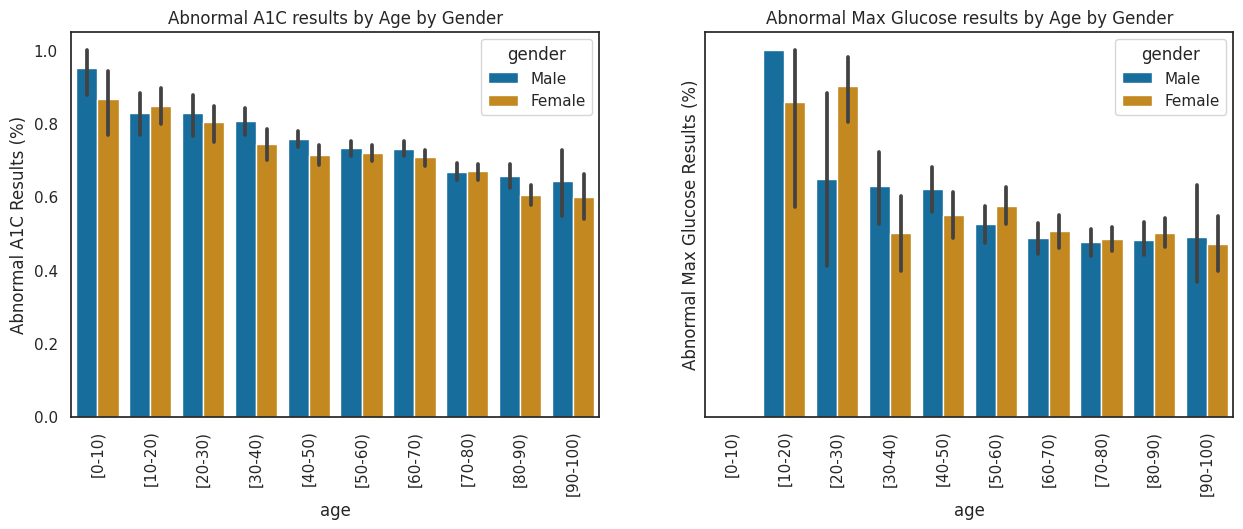

In [52]:
#Select all observations for which we have A1C/max_glu test results:
#On this temporary dfs, modify gender column values to improve visualization
a1c_df = df_clean.copy()
a1c_df = a1c_df[df_clean['A1Cresult'].notnull()]
a1c_df['gender'].replace({0:'Male', 1:'Female'}, inplace=True)

max_glu_df = df_clean.copy()
max_glu_df = max_glu_df[df_clean['max_glu_serum'].notnull()]
max_glu_df['gender'].replace({0:'Male', 1:'Female'}, inplace=True)

#Set up 2 subplots and figure size:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True);

#First graph:
sns.barplot(data=a1c_df, x='age', y='A1Cresult', hue='gender', order=['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], width=0.8, ax=axes[0])
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.ylabel('Abnormal A1C Results (%)')
plt.title('Abnormal A1C results by Age by Gender')


#Second Graph:
plt.subplot(1,2,2)
sns.barplot(data=max_glu_df, x='age', y='max_glu_serum', hue='gender', order=['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], width=0.8, ax=axes[1])
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.ylabel('Abnormal Max Glucose Results (%)')
plt.title('Abnormal Max Glucose results by Age by Gender')

plt.show();


4.2 What's the relationship between generic and diabetic medicines? How do they relate to `readmitted`?


**Key observations for Graph 2 - Medication Usage and Readmission:**


---


1.   The box plot shows a general trend that as the number of diabetic medicines increases, the number of generic medicines also tends to increase. This suggests that patients who require more diabetic medications also tend to use more generic medicines.


2.   Readmission rates seem to vary among different combinations of diabetic and generic medicine usage. Patients who are on more diabetic medicines and generic medicines have a higher likelihood of readmission.


3.   The graph provides insight into the relationship between medication usage and readmission, showing that medication management is an important factor in healthcare outcomes. (add here/change)


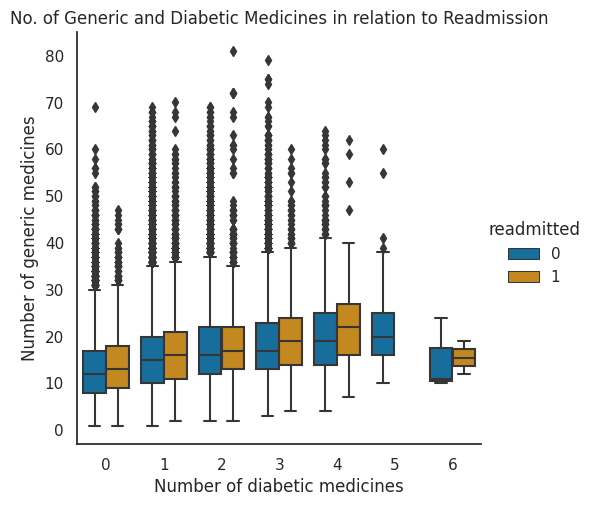

In [66]:
ax=sns.catplot(kind="box",data=medication_columns, x='num_diabetic_med', y='num_medications', hue='readmitted')
ax.set(xlabel='Number of diabetic medicines',
       ylabel='Number of generic medicines',
       title='No. of Generic and Diabetic Medicines in relation to Readmission');


4.3  How factors like age, race and gender affect the lenght of stay in the hospital and the eventual readmission?

---
In the graph below, we aim to examine the impact of three variables – age, race, and gender – on the length of hospital stays and readmission rates.

**Key observations for Graph 3 - Length of Stay by Age, Race, Gender, and Readmission:**


---


1.   The length of stay in the hospital generally increases with age, as expected. However, there's an exception in the 20-30 age group where it is relatively high.



2.   African Americans tend to have the longest hospital stays among racial groups, while Asians and Hispanics have shorter stays when there is no readmission.



3.   Male patients typically have shorter hospital stays compared to female patients.


4.  Patients who get readmitted tend to spend more time in the hospital per visit.


5. Patients who are readmitted tend to have longer average lengths of stay during their initial hospitalization compared to those who are not readmitted. This suggests that the severity of the initial condition or the presence of underlying health issues may contribute to readmission.
The significant difference in length of stay between the two groups indicates that early readmission might be associated with more complex medical situations that require extended care.



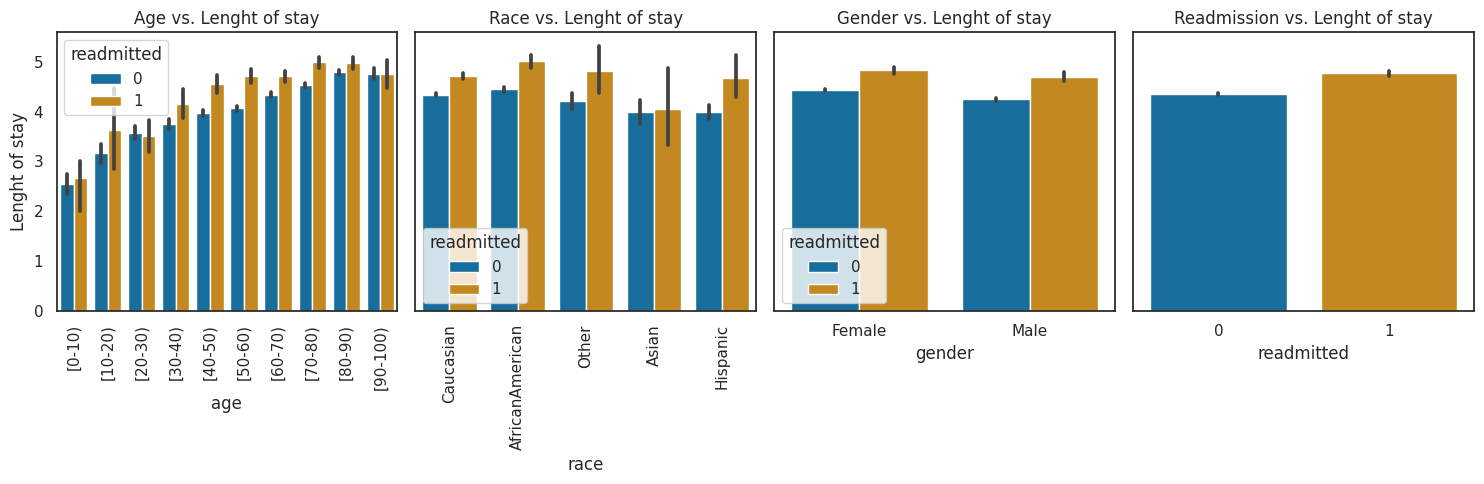

In [54]:
# Create a figure with three horizontal subplots to visualize how the lenght of stay change based on age, race and gender
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True);

# Create a bar plot for age
sns.barplot(data=df_clean, x='age', y='time_in_hospital', hue='readmitted', ax=axes[0])
plt.sca(axes[0])  #FOR TEAM: Set the current subplot for x-axis tick manipulation. chat GPT
plt.xticks(rotation=90)
axes[0].set_title('Age vs. Lenght of stay')

# Create a bar plot for race
sns.barplot(data=df_clean, x='race', y='time_in_hospital', hue='readmitted', ax=axes[1])
plt.sca(axes[1])
plt.xticks(rotation=90)
axes[1].set_title('Race vs. Lenght of stay')

# Create a bar plot for gender

#On this temporary dfs, modify gender column values to improve visualization
temp_gender_read = df_clean.copy()
temp_gender_read['gender'].replace({0:'Male', 1:'Female'}, inplace=True)

sns.barplot(data=temp_gender_read, x='gender', y='time_in_hospital', hue='readmitted', ax=axes[2])
plt.sca(axes[2])
axes[2].set_title('Gender vs. Lenght of stay')

# Lenght of stay vs readmissions
sns.barplot(data=df_clean, x='readmitted', y='time_in_hospital', ax=axes[3])
plt.sca(axes[3])
axes[3].set_title('Readmission vs. Lenght of stay')

# Delete single y label and set a common Y-axis label
for ax in axes:
    ax.set_ylabel('')
axes[0].set_ylabel('Lenght of stay')

plt.tight_layout()
plt.show()

4.4 Does amount of diagnoses vary by readmission?


**Key observations for Graph 4 - Diagnoses Composition by Readmission:**

---

1. The 1st graph shows the composition of diagnoses for patients with and without readmission. "Diseases of the Circulatory System" and "Complications of Pregnancy, Childbirth, and Puerperium" are the most common diagnoses for both groups.

2. The distribution of diagnoses varies slightly between the two groups, indicating that certain diagnoses may be more associated with readmission.

3.  This graph provides a snapshot of the types of diagnoses prevalent in the dataset, which can be valuable for understanding the health conditions of patients.

In [67]:
#create df_diag with readmission and diagnoese data, concating all three diagnoses into one column
df_diag = pd.DataFrame(columns = ["readmitted", "diag_cat"])

df1 = df_clean[["readmitted", "diag_1_cat"]].rename(columns={"diag_1_cat": "diag_cat"})
df2 = df_clean[["readmitted", "diag_2_cat"]].rename(columns={"diag_2_cat": "diag_cat"})
df3 = df_clean[["readmitted", "diag_3_cat"]].rename(columns={"diag_3_cat": "diag_cat"})

df_diag = pd.concat([df1, df2, df3])

In [56]:
#create df_diag_size with count of diagnoses by readmission
df_diag_size = df_diag.groupby(['readmitted', 'diag_cat'], as_index = False).size()


In [57]:
diag_readmission = df_diag_size[df_diag_size['readmitted'] == 1]
diag_readmission = diag_readmission.sort_values(by ='size', ascending = False).head(10)
diag_no_readmission = df_diag_size[df_diag_size['readmitted'] ==0]
diag_no_readmission = diag_no_readmission.sort_values(by ='size', ascending = False).head(10)

In [58]:
#transpose dataframe for graphing
df_diag_size = df_diag_size.set_index(['readmitted','diag_cat'])['size'].unstack()

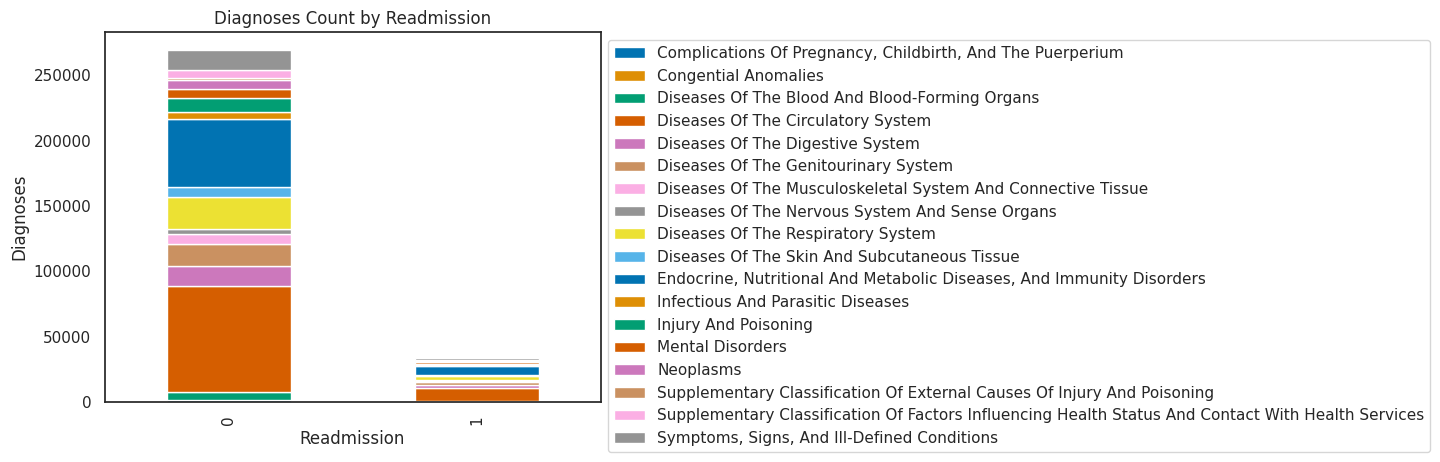

In [75]:
#To remove
dcr = df_diag_size.plot(kind='bar', stacked=True)
plt.xlabel('Readmission')
plt.ylabel('Diagnoses')
plt.title('Diagnoses Count by Readmission')
dcr.legend(fontsize=5)
sns.move_legend(dcr, "upper left", bbox_to_anchor=(1, 1))

In [60]:
diag_readmission_1 = diag_readmission.set_index(['readmitted','diag_cat'])['size'].unstack()
diag_readmission_1 = diag_readmission_1.div(diag_readmission_1.sum(axis=1), axis=0)

diag_no_readmission_1 = diag_no_readmission.set_index(['readmitted','diag_cat'])['size'].unstack()
diag_no_readmission_1 = diag_no_readmission_1.div(diag_no_readmission_1.sum(axis=1), axis=0)

<Figure size 1000x1500 with 0 Axes>

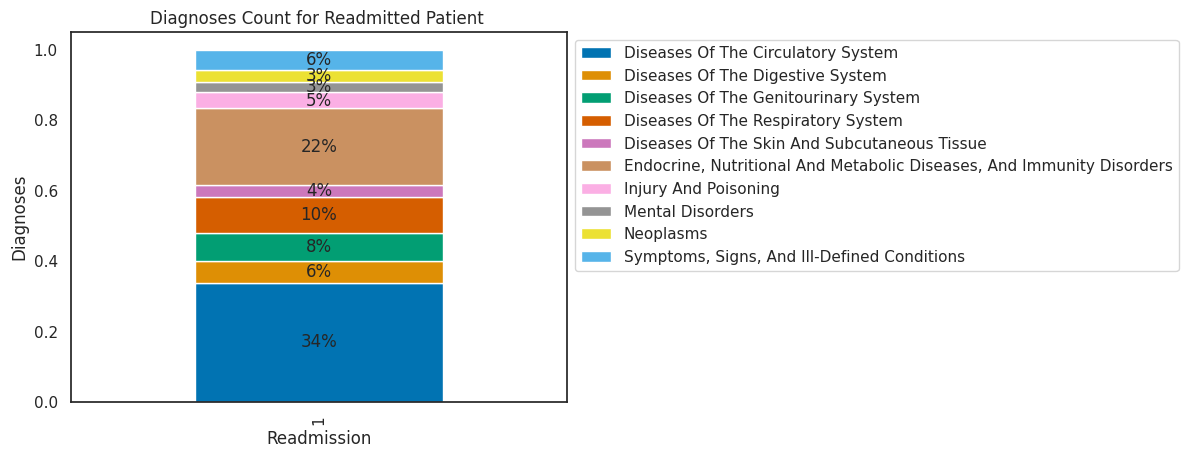

In [61]:
plt.figure(figsize=(10 , 15))
plt_readmission = diag_readmission_1.plot(kind='bar', stacked=True)

plt.xlabel('Readmission')
plt.ylabel('Diagnoses')

plt.title('Diagnoses Count for Readmitted Patient ')
plt_readmission.legend(fontsize=5)
sns.move_legend(plt_readmission, "upper left", bbox_to_anchor=(1, 1))


for container in plt_readmission.containers:
    plt_readmission.bar_label(container, label_type = 'center', fmt='{:.0%}')

<Figure size 1000x1500 with 0 Axes>

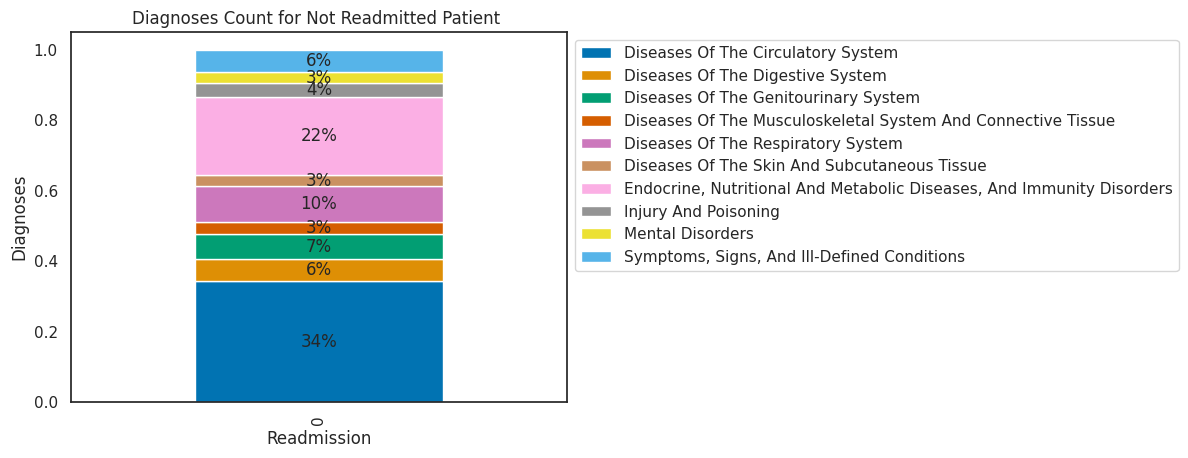

In [62]:
plt.figure(figsize=(10 , 15))
plt_readmission_no = diag_no_readmission_1.plot(kind='bar', stacked=True)

plt.xlabel('Readmission')
plt.ylabel('Diagnoses')

plt.title('Diagnoses Count for Not Readmitted Patient ')
plt_readmission_no.legend(fontsize=5)
sns.move_legend(plt_readmission_no, "upper left", bbox_to_anchor=(1, 1))


for container in plt_readmission_no.containers:
    plt_readmission_no.bar_label(container, label_type = 'center', fmt='{:.0%}')

4.5 Does being on diabetic medication affect the readmission rate?

**Key observations for Graph 5 - Diabetic Medication Usage and Readmission Rate:**


---


1.   The barplot shows that the percentage of patients readmitted to the hospital is higher for those on diabetic medication (labeled as 1), indicating that diabetic medication usage may be associated with a higher readmission rate.




2.   The graph suggests a potential correlation between diabetic medication usage and readmission, which could be explored further to understand the impact of medication management on patient outcomes.



3.   Further analysis is needed to determine whether diabetic medication usage is a causal factor for readmission or if there are other confounding variables at play.


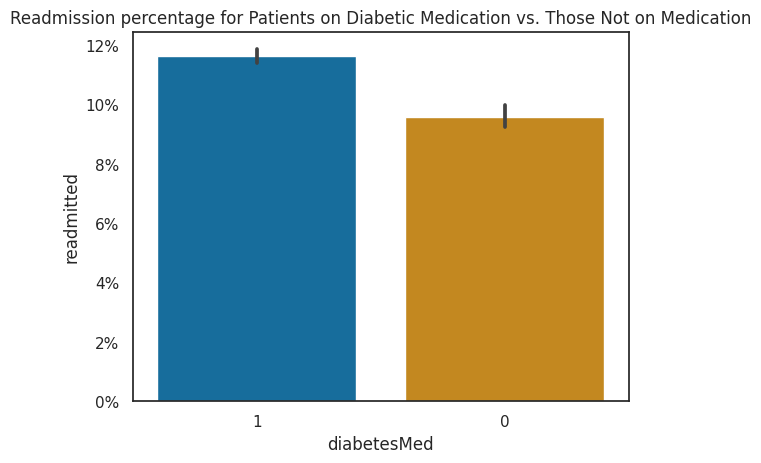

In [63]:
#barplot( x=key_diebetic_med_users, y= re-admission)
sns.barplot(data=df_clean, x='diabetesMed', y ='readmitted', estimator = lambda x: sum(x) / len(x) * 100, order=[1,0])
plt.title('Readmission percentage for Patients on Diabetic Medication vs. Those Not on Medication')
plt.yticks(ticks=[0, 2, 4, 6, 8, 10, 12], labels=['0%', '2%', '4%', '6%', '8%', '10%', '12%'])
plt.show()

**Reference List:**
- *Hospital Readmissions*. (2012). Agency for Healthcare Research and Quality. Retrieved September 30, 2023 from https://www.ahrq.gov/topics/hospital-readmissions.html

##Appendix

---



Heatmap

---


**Key observations for Graph 6 - Heatmap** (to be reviewed J)

1.  According to the heatmap, there appears to be a lower correlation between the number of diabetes medications prescribed and the readmission percentage. This suggests that patients on more diabetes medications tend to have a lower readmission rate.

2.  This negative correlation may be because patients with more complex health conditions receive more medications, but they are also better managed and less likely to be readmitted.



<ipython-input-64-3cbbecd45e0b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=heat_map.corr(), annot=False, cmap='coolwarm', linewidths=.4,)


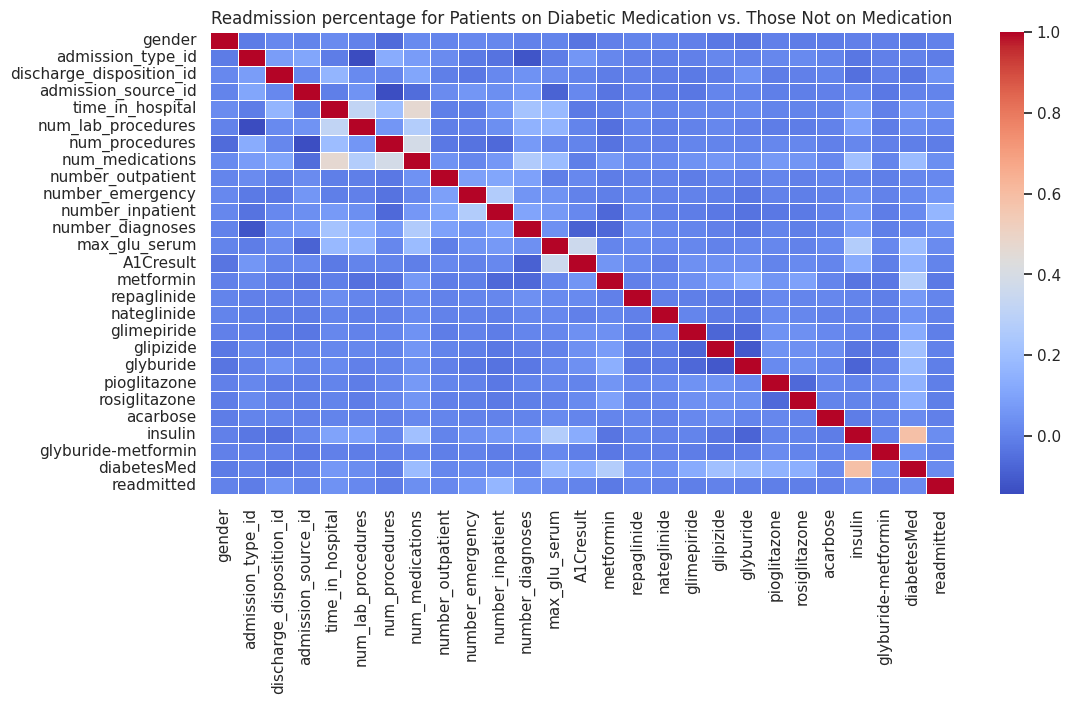

In [64]:
plt.figure(figsize=(12, 6))
heat_map=df_clean.drop(['patient_nbr', 'diag_1_cat', 'diag_2_cat', 'diag_3_cat'], axis=1)
sns.heatmap(data=heat_map.corr(), annot=False, cmap='coolwarm', linewidths=.4,)
plt.title('Readmission percentage for Patients on Diabetic Medication vs. Those Not on Medication')
plt.show();